In diverse real-world contexts, efficiently navigating in a complex environment is extremely important. 

One popular content is finding the shortest path from one point to another with some restrictions.

For example, in the graph below, every node represents a MRT station.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

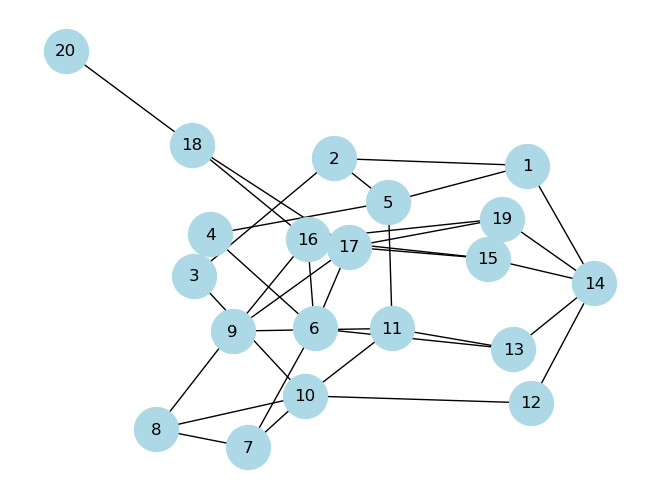

In [99]:
#display the geaph
graph = {
    1: {2, 5,14},
    2: {1, 3, 5},
    3: {2, 4,10},
    4: {3, 5, 6},
    5: {1, 2, 4,11},
    6: {4,7,13,17},
    7: {8, 10},
    8: {7, 9, 10},
    9: {8, 11,16},
    10: {3,7, 8, 11, 12},
    11: {5,9, 10, 13},
    12: {10, 14},
    13: {6,11, 14},
    14: {1,12, 13, 15,19},
    15: {14, 16, 17},
    16: {6,15},
    17: {9,15, 18, 19},
    18: {16, 20},
    19: {16},
    20: {18}
}

# Create a graph from the given dictionary
G = nx.Graph(graph)

# Plot the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000)
plt.show()

Total nodes: 20
Total nodes visited: 12
Ratio of Total nodes visited to Total nodes: 0.6
Final path distance: 3
Shortest path from 1 to 10 : [1, 2, 3, 10]
Total nodes: 20
Total nodes visited: 20
Ratio of Total nodes visited to Total nodes: 1.0
Final path distance: 6
Shortest path from 10 to 20 : [10, 3, 4, 6, 17, 18, 20]
Total path distance: 9


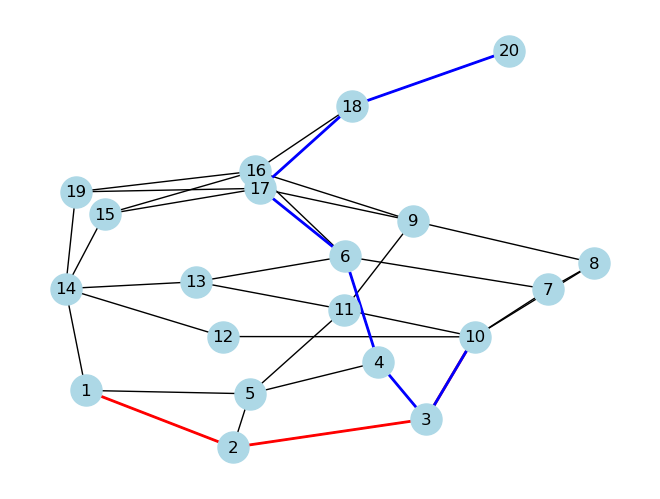

In [104]:
#breadth-first search with FIFO Queue
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, List

def breadth_first_search(graph: Dict[int, set], start: int, end: int, mid: int) -> List[int]:
    visited = set()  # To keep track of visited nodes
    queue = [(start, [start])]  # Queue to store the current node and its path
    total_nodes = len(graph)
    total_visited = 0  # Variable to count the total nodes visited

    while queue:
        (current_node, path) = queue.pop(0)  # Dequeue the current node and its path
        if current_node not in visited:
            visited.add(current_node)
            total_visited += 1

            if current_node == end:  # If destination node is reached, return the path
                path_distance = len(path) - 1  # Calculate the path distance
                ratio_visited = total_visited / total_nodes
                print("Total nodes:", total_nodes)
                print("Total nodes visited:", total_visited)
                print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
                print("Final path distance:", path_distance)
                return path, path_distance

            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))  # Enqueue neighbor with updated path

    ratio_visited = total_visited / total_nodes
    print("Total nodes:", total_nodes)
    print("Total nodes visited:", total_visited)
    print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
    print("Final path distance: No path found")
    return [], 0  # If no path found

#graph:
graph = {
    1: {2, 5, 14},
    2: {1, 3, 5},
    3: {2, 4, 10},
    4: {3, 5, 6},
    5: {1, 2, 4, 11},
    6: {4, 7, 13, 17},
    7: {8, 10},
    8: {7, 9, 10},
    9: {8, 11, 16},
    10: {3, 7, 8, 11, 12},
    11: {5, 9, 10, 13},
    12: {10, 14},
    13: {6, 11, 14},
    14: {1, 12, 13, 15, 19},
    15: {14, 16, 17},
    16: {6, 15},
    17: {9, 15, 18, 19},
    18: {16, 20},
    19: {16},
    20: {18}
}

start_node = 1
mid_node = 10
end_node = 20

# Find the shortest path from start_node to mid_node
path1, distance1 = breadth_first_search(graph, start_node, mid_node, mid_node)
print("Shortest path from", start_node, "to", mid_node, ":", path1)

# Find the shortest path from mid_node to end_node
path2, distance2 = breadth_first_search(graph, mid_node, end_node, mid_node)
print("Shortest path from", mid_node, "to", end_node, ":", path2)

total_distance = distance1 + distance2
print("Total path distance:", total_distance)

# Plotting the graph with route marked in red (from start_node to mid_node) 
#and blue (from mid_node to end_node)
G = nx.Graph(graph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
path_edges1 = list(zip(path1, path1[1:]))
path_edges2 = list(zip(path2, path2[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges1, edge_color='red', width=2)
nx.draw_networkx_edges(G, pos, edgelist=path_edges2, edge_color='blue', width=2)
plt.show()


Total nodes: 20
Total nodes visited: 12
Ratio of Total nodes visited to Total nodes: 0.6
Final path distance: 3
Shortest path from 1 to 10 : [1, 2, 3, 10]
Total nodes: 20
Total nodes visited: 20
Ratio of Total nodes visited to Total nodes: 1.0
Final path distance: 6
Shortest path from 10 to 20 : [10, 3, 4, 6, 17, 18, 20]
Total path distance: 9


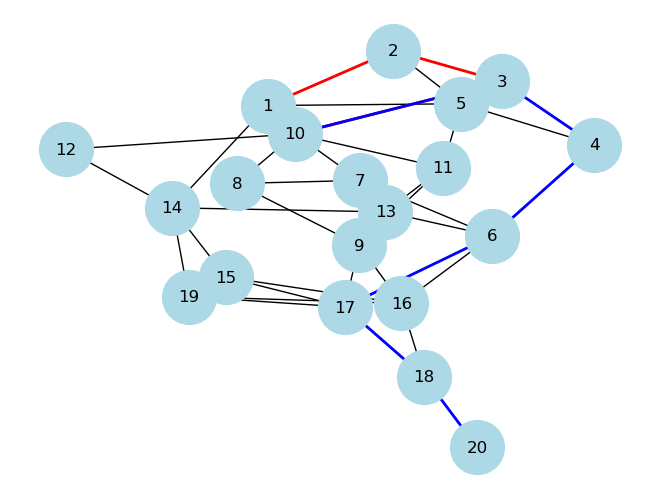

In [94]:
#uniform-cost search 
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, List
from queue import PriorityQueue

def uniform_cost_search(graph: Dict[int, set], start: int, end: int) -> List[int]:
    visited = set()  # To keep track of visited nodes
    pq = PriorityQueue()  # Priority queue to store (cost, node) tuples
    pq.put((0, [start]))  # Enqueue the start node with cost 0
    total_nodes = len(graph)
    total_visited = 0  # Variable to count the total nodes visited

    while not pq.empty():
        cost, path = pq.get()  # Dequeue the node with the lowest cost
        current_node = path[-1]  # Get the current node from the path
        if current_node not in visited:
            visited.add(current_node)
            total_visited += 1

            if current_node == end:  # If destination node is reached, return the path
                path_distance = len(path) - 1  # Calculate the path distance
                ratio_visited = total_visited / total_nodes
                print("Total nodes:", total_nodes)
                print("Total nodes visited:", total_visited)
                print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
                print("Final path distance:", path_distance)
                return path

            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    pq.put((cost + 1, path + [neighbor]))  # Enqueue neighbor with updated path and cost

    ratio_visited = total_visited / total_nodes
    print("Total nodes:", total_nodes)
    print("Total nodes visited:", total_visited)
    print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
    print("Final path distance: No path found")
    return []  # If no path found

# graph:
graph = {
    1: {2, 5, 14},
    2: {1, 3, 5},
    3: {2, 4, 10},
    4: {3, 5, 6},
    5: {1, 2, 4, 11},
    6: {4, 7, 13, 17},
    7: {8, 10},
    8: {7, 9, 10},
    9: {8, 11, 16},
    10: {3, 7, 8, 11, 12},
    11: {5, 9, 10, 13},
    12: {10, 14},
    13: {6, 11, 14},
    14: {1, 12, 13, 15, 19},
    15: {14, 16, 17},
    16: {6, 15},
    17: {9, 15, 18, 19},
    18: {16, 20},
    19: {16},
    20: {18}
}

start_node = 1
mid_node = 10
end_node = 20

# Find the shortest path from start_node to mid_node
path1 = uniform_cost_search(graph, start_node, mid_node)
print("Shortest path from", start_node, "to", mid_node, ":", path1)

# Find the shortest path from mid_node to end_node
path2 = uniform_cost_search(graph, mid_node, end_node)
print("Shortest path from", mid_node, "to", end_node, ":", path2)

total_distance = len(path1) - 1 + len(path2) - 1  # Total path distance is sum of distances from start to mid and mid to end
print("Total path distance:", total_distance)

# Plotting the graph with route marked in red (from start_node to mid_node) and blue (from mid_node to end_node)
G = nx.Graph(graph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500)
path_edges1 = list(zip(path1, path1[1:]))
path_edges2 = list(zip(path2, path2[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges1, edge_color='red', width=2)
nx.draw_networkx_edges(G, pos, edgelist=path_edges2, edge_color='blue', width=2)
plt.show()

Total nodes: 20
Total nodes visited: 9
Ratio of Total nodes visited to Total nodes: 0.45
Final path distance: 8
Shortest path from 1 to 10 : [1, 14, 15, 17, 19, 16, 6, 7, 10]
Total nodes: 20
Total nodes visited: 20
Ratio of Total nodes visited to Total nodes: 1.0
Final path distance: 6
Shortest path from 10 to 20 : [10, 12, 14, 15, 17, 18, 20]
Total path distance: 14


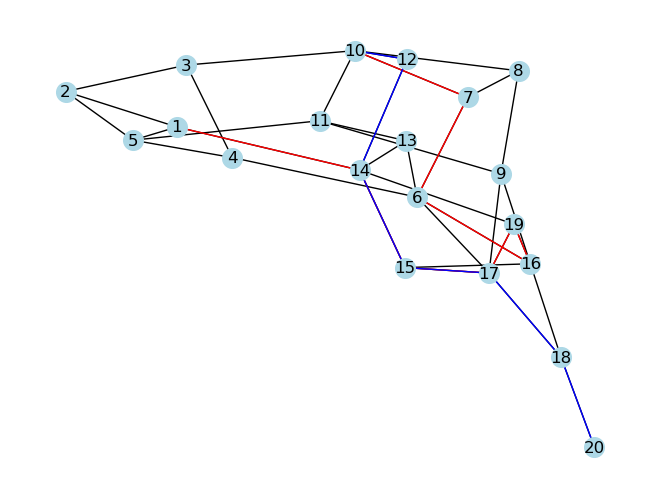

In [90]:
#depth-first search 
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, List

def shortest_path(graph: Dict[int, set], start: int, end: int, mid: int) -> List[int]:
    visited = set()  # To keep track of visited nodes
    stack = [(start, [start])]  # Stack to store the current node and its path
    total_nodes = len(graph)
    total_visited = 0  # Variable to count the total nodes visited

    while stack:
        (current_node, path) = stack.pop()  # Pop the current node and its path from stack
        if current_node not in visited:
            visited.add(current_node)
            total_visited += 1

            if current_node == end:  # If destination node is reached, return the path
                path_distance = len(path) - 1  # Calculate the path distance
                ratio_visited = total_visited / total_nodes
                print("Total nodes:", total_nodes)
                print("Total nodes visited:", total_visited)
                print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
                print("Final path distance:", path_distance)
                return path, path_distance

            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))  # Add neighbor to stack with updated path

    ratio_visited = total_visited / total_nodes
    print("Total nodes:", total_nodes)
    print("Total nodes visited:", total_visited)
    print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
    print("Final path distance: No path found")
    return [], 0  # If no path found

# graph:
graph = {
    1: {2, 5, 14},
    2: {1, 3, 5},
    3: {2, 4, 10},
    4: {3, 5, 6},
    5: {1, 2, 4, 11},
    6: {4, 7, 13, 17},
    7: {8, 10},
    8: {7, 9, 10},
    9: {8, 11, 16},
    10: {3, 7, 8, 11, 12},
    11: {5, 9, 10, 13},
    12: {10, 14},
    13: {6, 11, 14},
    14: {1, 12, 13, 15, 19},
    15: {14, 16, 17},
    16: {6, 15},
    17: {9, 15, 18, 19},
    18: {16, 20},
    19: {16},
    20: {18}
}

start_node = 1
mid_node = 10
end_node = 20

# Find the shortest path from start_node to mid_node
path1, distance1 = shortest_path(graph, start_node, mid_node, mid_node)
print("Shortest path from", start_node, "to", mid_node, ":", path1)

# Find the shortest path from mid_node to end_node
path2, distance2 = shortest_path(graph, mid_node, end_node, mid_node)
print("Shortest path from", mid_node, "to", end_node, ":", path2)

total_distance = distance1 + distance2
print("Total path distance:", total_distance)

# Plotting the graph with route marked in red (from start_node to mid_node) and blue (from mid_node to end_node)
G = nx.Graph(graph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200)
path_edges1 = list(zip(path1, path1[1:]))
path_edges2 = list(zip(path2, path2[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges1, edge_color='red', width=1)
nx.draw_networkx_edges(G, pos, edgelist=path_edges2, edge_color='blue', width=1)
plt.show()

Shortest path from 1 to 10 : [1, 14, 15, 17, 19, 16, 6, 7, 10]
Shortest path from 10 to 20 : [10, 12, 14, 15, 17, 18, 20]
Total path distance: 14


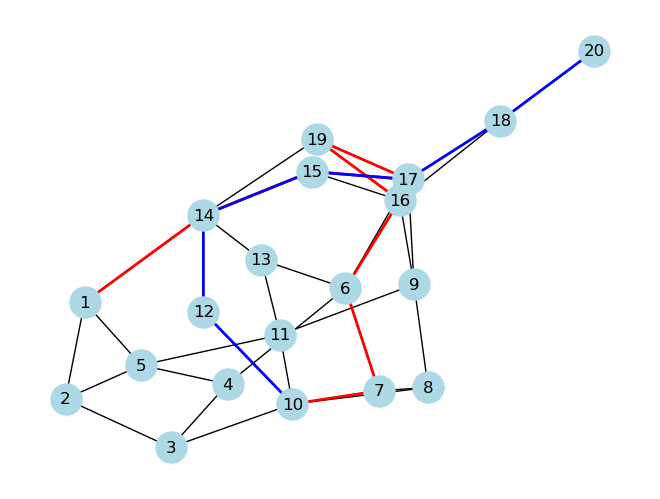

In [102]:
#depth-limited search
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, List

def depth_limited_search(graph: Dict[int, set], start: int, end: int, limit: int) -> List[int]:
    visited = set()  # To keep track of visited nodes
    stack = [(start, [start])]  # Stack to store the current node and its path

    while stack:
        (current_node, path) = stack.pop()  # Pop the current node and its path from stack
        if current_node not in visited:
            visited.add(current_node)

            if current_node == end:  # If destination node is reached, return the path
                return path

            if len(path) <= limit:  # Limit the depth of the search
                for neighbor in graph[current_node]:
                    if neighbor not in visited:
                        stack.append((neighbor, path + [neighbor]))  # Add neighbor to stack with updated path

    return []  # If no path found within the depth limit

# graph:
graph = {
    1: {2, 5, 14},
    2: {1, 3, 5},
    3: {2, 4, 10},
    4: {3, 5, 6},
    5: {1, 2, 4, 11},
    6: {4, 7, 13, 17},
    7: {8, 10},
    8: {7, 9, 10},
    9: {8, 11, 16},
    10: {3, 7, 8, 11, 12},
    11: {5, 9, 10, 13},
    12: {10, 14},
    13: {6, 11, 14},
    14: {1, 12, 13, 15, 19},
    15: {14, 16, 17},
    16: {6, 15},
    17: {9, 15, 18, 19},
    18: {16, 20},
    19: {16},
    20: {18}
}

start_node = 1
mid_node = 10
end_node = 20

# Find the shortest path from start_node to mid_node
path1 = depth_limited_search(graph, start_node, mid_node, 10)
print("Shortest path from", start_node, "to", mid_node, ":", path1)

# Find the shortest path from mid_node to end_node
path2 = depth_limited_search(graph, mid_node, end_node, 10)
print("Shortest path from", mid_node, "to", end_node, ":", path2)

total_distance = len(path1) - 1 + len(path2) - 1  # Total path distance is sum of distances from start to mid and mid to end
print("Total path distance:", total_distance)

# Plotting the graph with route marked in red (from start_node to mid_node) and blue (from mid_node to end_node)
G = nx.Graph(graph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
path_edges1 = list(zip(path1, path1[1:]))
path_edges2 = list(zip(path2, path2[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges1, edge_color='red', width=2)
nx.draw_networkx_edges(G, pos, edgelist=path_edges2, edge_color='blue', width=2)
plt.show()

Total nodes: 20
Total nodes visited: 0
Ratio of Total nodes visited to Total nodes: 0.0
Final path distance: 3
Shortest path from 1 to 10 : [1, 14, 12, 10]
Total nodes: 20
Total nodes visited: 0
Ratio of Total nodes visited to Total nodes: 0.0
Final path distance: 6
Shortest path from 10 to 20 : [10, 12, 14, 15, 17, 18, 20]
Total path distance: 9


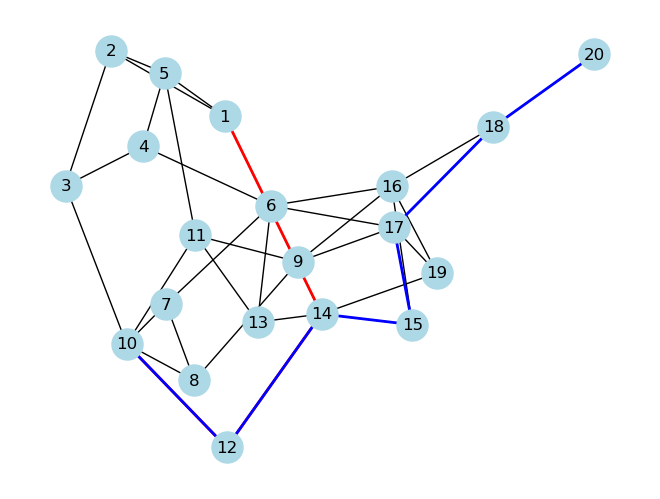

In [105]:
#iterative deepening search
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, List

def depth_limited_search(graph: Dict[int, set], start: int, end: int, limit: int) -> List[int]:
    visited = set()  # To keep track of visited nodes
    stack = [(start, [start])]  # Stack to store the current node and its path

    while stack:
        (current_node, path) = stack.pop()  # Pop the current node and its path from stack
        if current_node not in visited:
            visited.add(current_node)

            if current_node == end:  # If destination node is reached, return the path
                return path

            if len(path) <= limit:  # Limit the depth of the search
                for neighbor in graph[current_node]:
                    if neighbor not in visited:
                        stack.append((neighbor, path + [neighbor]))  # Add neighbor to stack with updated path

    return []  # If no path found within the depth limit

def iterative_deepening_search(graph: Dict[int, set], start: int, end: int) -> List[int]:
    total_nodes = len(graph)
    total_visited = 0  # Variable to count the total nodes visited

    for depth_limit in range(total_nodes):  # Increase depth limit iteratively
        path = depth_limited_search(graph, start, end, depth_limit)
        total_visited += len(path) - 1
        if path:
            ratio_visited = total_visited / total_nodes
            print("Total nodes:", total_nodes)
            print("Total nodes visited:", total_visited)
            print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
            print("Final path distance:", len(path) - 1)
            return path

    ratio_visited = total_visited / total_nodes
    print("Total nodes:", total_nodes)
    print("Total nodes visited:", total_visited)
    print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
    print("Final path distance: No path found")
    return []

# graph:
graph = {
    1: {2, 5, 14},
    2: {1, 3, 5},
    3: {2, 4, 10},
    4: {3, 5, 6},
    5: {1, 2, 4, 11},
    6: {4, 7, 13, 17},
    7: {8, 10},
    8: {7, 9, 10},
    9: {8, 11, 16},
    10: {3, 7, 8, 11, 12},
    11: {5, 9, 10, 13},
    12: {10, 14},
    13: {6, 11, 14},
    14: {1, 12, 13, 15, 19},
    15: {14, 16, 17},
    16: {6, 15},
    17: {9, 15, 18, 19},
    18: {16, 20},
    19: {16},
    20: {18}
}

start_node = 1
mid_node = 10
end_node = 20

# Find the shortest path from start_node to mid_node
path1 = iterative_deepening_search(graph, start_node, mid_node)
print("Shortest path from", start_node, "to", mid_node, ":", path1)

# Find the shortest path from mid_node to end_node
path2 = iterative_deepening_search(graph, mid_node, end_node)
print("Shortest path from", mid_node, "to", end_node, ":", path2)

total_distance = len(path1) - 1 + len(path2) - 1  # Total path distance is sum of distances from start to mid and mid to end
print("Total path distance:", total_distance)

# Plotting the graph with route marked in red (from start_node to mid_node) and blue (from mid_node to end_node)
G = nx.Graph(graph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
path_edges1 = list(zip(path1, path1[1:]))
path_edges2 = list(zip(path2, path2[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges1, edge_color='red', width=2)
nx.draw_networkx_edges(G, pos, edgelist=path_edges2, edge_color='blue', width=2)
plt.show()


Total nodes: 20
Total nodes visited: 20
Ratio of Total nodes visited to Total nodes: 1.0
Final path distance: 3
Shortest path from 1 to 10 : [1, 2, 3, 10]
Total nodes: 20
Total nodes visited: 20
Ratio of Total nodes visited to Total nodes: 1.0
Final path distance: 6
Shortest path from 10 to 20 : [10, 3, 4, 6, 17, 18, 20]
Total path distance: 9


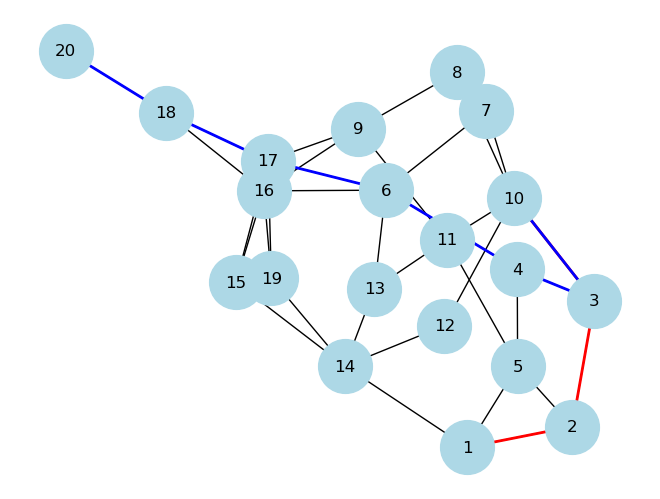

In [68]:
#greedy search
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, List

def greedy_search(graph: Dict[int, set], start: int, end: int) -> List[int]:
    visited = set()  # To keep track of visited nodes
    stack = [(start, [start])]  # Stack to store the current node and its path
    total_nodes = len(graph)
    total_visited = 0  # Variable to count the total nodes visited

    while stack:
        stack.sort(key=lambda x: len(graph[x[0]].intersection(graph[end]))) # sort stack by the number of neighbor that the neighbor has the same neighbor with the end node 
        (current_node, path) = stack.pop(0)  # Pop the current node and its path from stack
        if current_node not in visited:
            visited.add(current_node)
            total_visited += 1

            if current_node == end:  # If destination node is reached, return the path
                path_distance = len(path) - 1  # Calculate the path distance
                ratio_visited = total_visited / total_nodes
                print("Total nodes:", total_nodes)
                print("Total nodes visited:", total_visited)
                print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
                print("Final path distance:", path_distance)
                return path

            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))  # Add neighbor to stack with updated path

    ratio_visited = total_visited / total_nodes
    print("Total nodes:", total_nodes)
    print("Total nodes visited:", total_visited)
    print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
    print("Final path distance: No path found")
    return []  # If no path found

# graph:
graph = {
    1: {2, 5, 14},
    2: {1, 3, 5},
    3: {2, 4, 10},
    4: {3, 5, 6},
    5: {1, 2, 4, 11},
    6: {4, 7, 13, 17},
    7: {8, 10},
    8: {7, 9, 10},
    9: {8, 11, 16},
    10: {3, 7, 8, 11, 12},
    11: {5, 9, 10, 13},
    12: {10, 14},
    13: {6, 11, 14},
    14: {1, 12, 13, 15, 19},
    15: {14, 16, 17},
    16: {6, 15},
    17: {9, 15, 18, 19},
    18: {16, 20},
    19: {16},
    20: {18}
}

start_node = 1
mid_node = 10
end_node = 20

# Find the shortest path from start_node to mid_node
path1 = greedy_search(graph, start_node, mid_node)
print("Shortest path from", start_node, "to", mid_node, ":", path1)

# Find the shortest path from mid_node to end_node
path2 = greedy_search(graph, mid_node, end_node)
print("Shortest path from", mid_node, "to", end_node, ":", path2)

total_distance = len(path1) - 1 + len(path2) - 1  # Total path distance is sum of distances from start to mid and mid to end
print("Total path distance:", total_distance)

# Plotting the graph with route marked in red (from start_node to mid_node) and blue (from mid_node to end_node)
G = nx.Graph(graph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500)
path_edges1 = list(zip(path1, path1[1:]))
path_edges2 = list(zip(path2, path2[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges1, edge_color='red', width=2)
nx.draw_networkx_edges(G, pos, edgelist=path_edges2, edge_color='blue', width=2)
plt.show()


Total nodes: 20
Total nodes visited: 4
Ratio of Total nodes visited to Total nodes: 0.2
Final path distance: 3
Shortest path from 1 to 10 : [1, 14, 12, 10]
Total nodes: 20
Total nodes visited: 8
Ratio of Total nodes visited to Total nodes: 0.4
Final path distance: 6
Shortest path from 10 to 20 : [10, 12, 14, 15, 17, 18, 20]
Total path distance: 9


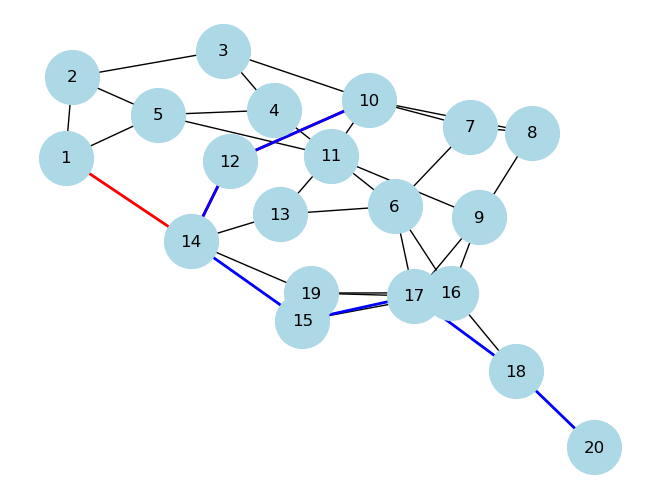

In [69]:
#A* search
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, List

def heuristic(node, goal):
    # Define a simple heuristic: the number of nodes between the current node and the goal node
    return abs(node - goal)

def astar_search(graph: Dict[int, set], start: int, end: int) -> List[int]:
    visited = set()  # To keep track of visited nodes
    open_set = [(0 + heuristic(start, end), 0, [start])]  # Priority queue to store (f, g, path) tuples
    total_nodes = len(graph)
    total_visited = 0  # Variable to count the total nodes visited

    while open_set:
        open_set.sort(key=lambda x: x[0])  # Sort the open set based on f value
        f, g, path = open_set.pop(0)  # Pop the node with the lowest f value
        current_node = path[-1]  # Get the current node from the path
        if current_node not in visited:
            visited.add(current_node)
            total_visited += 1

            if current_node == end:  # If destination node is reached, return the path
                path_distance = len(path) - 1  # Calculate the path distance
                ratio_visited = total_visited / total_nodes
                print("Total nodes:", total_nodes)
                print("Total nodes visited:", total_visited)
                print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
                print("Final path distance:", path_distance)
                return path

            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    new_g = g + 1  # Cost to reach neighbor is 1 (since unweighted graph)
                    new_f = new_g + heuristic(neighbor, end)  # Calculate f value for neighbor
                    open_set.append((new_f, new_g, path + [neighbor]))  # Add neighbor to open set with updated path and f value

    ratio_visited = total_visited / total_nodes
    print("Total nodes:", total_nodes)
    print("Total nodes visited:", total_visited)
    print("Ratio of Total nodes visited to Total nodes:", ratio_visited)
    print("Final path distance: No path found")
    return []  # If no path found

# graph:
graph = {
    1: {2, 5, 14},
    2: {1, 3, 5},
    3: {2, 4, 10},
    4: {3, 5, 6},
    5: {1, 2, 4, 11},
    6: {4, 7, 13, 17},
    7: {8, 10},
    8: {7, 9, 10},
    9: {8, 11, 16},
    10: {3, 7, 8, 11, 12},
    11: {5, 9, 10, 13},
    12: {10, 14},
    13: {6, 11, 14},
    14: {1, 12, 13, 15, 19},
    15: {14, 16, 17},
    16: {6, 15},
    17: {9, 15, 18, 19},
    18: {16, 20},
    19: {16},
    20: {18}
}

start_node = 1
mid_node = 10
end_node = 20

# Find the shortest path from start_node to mid_node
path1 = astar_search(graph, start_node, mid_node)
print("Shortest path from", start_node, "to", mid_node, ":", path1)

# Find the shortest path from mid_node to end_node
path2 = astar_search(graph, mid_node, end_node)
print("Shortest path from", mid_node, "to", end_node, ":", path2)

total_distance = len(path1) - 1 + len(path2) - 1  # Total path distance is sum of distances from start to mid and mid to end
print("Total path distance:", total_distance)

# Plotting the graph with route marked in red (from start_node to mid_node) and blue (from mid_node to end_node)
G = nx.Graph(graph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500)
path_edges1 = list(zip(path1, path1[1:]))
path_edges2 = list(zip(path2, path2[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges1, edge_color='red', width=2)
nx.draw_networkx_edges(G, pos, edgelist=path_edges2, edge_color='blue', width=2)
plt.show()